In [2]:
#Predict whether a credit card application will be approved or denied 
#based on various features such as income, age, and credit score? Use 
#the Credit Card Approval dataset, which contains information on credit 
#card applications and their associated outcomes, and apply Random 
#Forest to predict whether an application will be approved or denied.

In [3]:
#Import Libraries
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
#Load CSV df1
df1=pd.read_csv('Credit.csv',index_col='ID')

#Clean Data
#Remove OCCUPATION_TYPE
try:
    df1.drop(columns=['OCCUPATION_TYPE'], inplace=True)
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Convert DAYS_BIRTH in AGE
try:
    df1['AGE']=(-1*df1['DAYS_BIRTH']/365.25).round(0)
    df1.drop(columns=['DAYS_BIRTH'], inplace=True)
except Exception as e:
    print(f"Error : {e}")
    
#Clean Data
#Convert DAYS_EMPLOYED in YEARS_EMPLOYED
try:
    df1['YEARS_EMPLOYED']=(-1*df1['DAYS_EMPLOYED']/365.25).round(0)
    df1.drop(columns=['DAYS_EMPLOYED'], inplace=True)
except Exception as e:
    print(f"Error : {e}")

In [5]:
#Read CSV df2
df2=pd.read_csv('CreditRecord.csv',index_col='ID')

#Clean Data
#Remove MONTHS_BALANCE
try:
    df2.drop(columns=['MONTHS_BALANCE'], inplace=True)
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Delete X
try:
    df2=df2[df2['STATUS']!='X']
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Group by ID
df2=df2.groupby('ID')['STATUS'].agg(list).reset_index()
df2.set_index('ID', inplace=True)
df2.head()

#Clean Data
#Calculate the percentage of values that are not 'C' rounded to 0, 25, 50, 75 or 100
def percentage_credit_accepted(list):
    if not list: #Check if the list is empty
        return 0.0
    else:
        count_non_C=sum(1 for statut in list if statut!='C')
        #return (count_non_C/len(list))*10.0
        return (count_non_C/len(list))*100.0

#Clean Data
#Apply the function to the 'STATUS' column and create a new 'Pourcentage_non_C' column
try:
    #df2['CREDIT_RATE']=df2['STATUS'].apply(percentage_credit_accepted).apply(math.floor)*10.0
    df2['CREDIT_RATE']=df2['STATUS'].apply(percentage_credit_accepted)
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Remove STATUS
try:
    df2.drop(columns=['STATUS'], inplace=True)
except Exception as e:
    print(f"Error : {e}")

In [6]:
#Read CSV df2
df2=pd.read_csv('CreditRecord.csv',index_col='ID')

#Clean Data
#Remove MONTHS_BALANCE
try:
    df2.drop(columns=['MONTHS_BALANCE'], inplace=True)
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Delete X
try:
    df2=df2[df2['STATUS']!='X']
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Group by ID
df2=df2.groupby('ID')['STATUS'].agg(list).reset_index()
df2.set_index('ID', inplace=True)
df2.head()

#Clean Data
#Calculate the percentage of values that are not 'C' rounded to 0, 25, 50, 75 or 100
def percentage_credit_accepted(list):
    if not list: #Check if the list is empty
        return 0.0
    else:
        count_non_C=sum(1 for statut in list if statut!='C')
        credit_rate=count_non_C/len(list)
        if credit_rate < 0.125:
            return 0
        elif credit_rate < 0.375:
            return 25
        elif credit_rate < 0.625:
            return 50
        elif credit_rate < 0.875:
            return 75
        else:
            return 100

#Clean Data
#Apply the function to the 'STATUS' column and create a new 'Pourcentage_non_C' column
try:
    #df2['CREDIT_RATE']=df2['STATUS'].apply(percentage_credit_accepted).apply(math.floor)*10.0
    df2['CREDIT_RATE']=df2['STATUS'].apply(percentage_credit_accepted)
except Exception as e:
    print(f"Error : {e}")

#Clean Data
#Remove STATUS
try:
    df2.drop(columns=['STATUS'], inplace=True)
except Exception as e:
    print(f"Error : {e}")

In [7]:
#Create the DataFrame df
df=df1.merge(df2,how='inner',left_index=True,right_index=True)

In [8]:
#Explore Data
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_RATE
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2.0,33.0,12.0,25
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,2.0,33.0,12.0,25
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,59.0,3.0,50
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,52.0,8.0,100
5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,52.0,8.0,25


In [9]:
#Analyze Data
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_RATE
count,33110.000000,3.311000e+04,33110.0,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000,33110.000000
mean,0.427756,1.858772e+05,1.0,0.224011,0.292419,0.090396,2.194654,43.833434,-164.346149,64.657203
std,0.741716,1.014124e+05,0.0,0.416936,0.454881,0.286752,0.911076,11.548445,378.781701,37.511507
min,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,-1000.000000,0.000000
25%,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,25.000000
50%,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,43.000000,4.000000,75.000000
75%,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,9.000000,100.000000
max,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,69.000000,43.000000,100.000000


In [10]:
#Analyze Data
df['CREDIT_RATE'].value_counts()

100    15609
25      7494
50      4167
0       3384
75      2456
Name: CREDIT_RATE, dtype: int64

In [11]:
#Analyze Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33110 entries, 5008804 to 5150487
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          33110 non-null  object 
 1   FLAG_OWN_CAR         33110 non-null  object 
 2   FLAG_OWN_REALTY      33110 non-null  object 
 3   CNT_CHILDREN         33110 non-null  int64  
 4   AMT_INCOME_TOTAL     33110 non-null  float64
 5   NAME_INCOME_TYPE     33110 non-null  object 
 6   NAME_EDUCATION_TYPE  33110 non-null  object 
 7   NAME_FAMILY_STATUS   33110 non-null  object 
 8   NAME_HOUSING_TYPE    33110 non-null  object 
 9   FLAG_MOBIL           33110 non-null  int64  
 10  FLAG_WORK_PHONE      33110 non-null  int64  
 11  FLAG_PHONE           33110 non-null  int64  
 12  FLAG_EMAIL           33110 non-null  int64  
 13  CNT_FAM_MEMBERS      33110 non-null  float64
 14  AGE                  33110 non-null  float64
 15  YEARS_EMPLOYED       33110 n

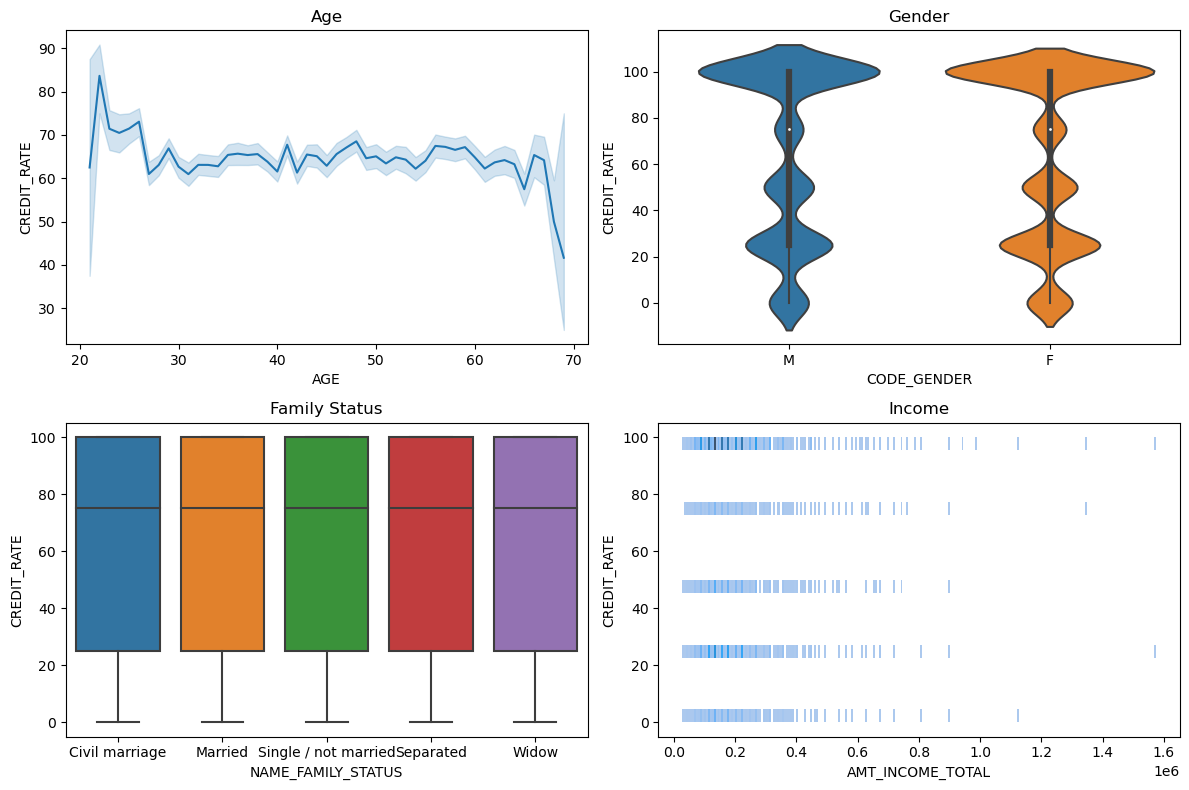

In [12]:
#Visualize Data
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))

sns.lineplot(x=df['AGE'],y=df['CREDIT_RATE'],ax=axes[0,0])
axes[0,0].set_title('Age')

sns.violinplot(x=df['CODE_GENDER'],y=df['CREDIT_RATE'],ax=axes[0,1])
axes[0,1].set_title('Gender')

sns.boxplot(x=df['NAME_FAMILY_STATUS'],y=df['CREDIT_RATE'],ax=axes[1,0])
axes[1,0].set_title('Family Status')

sns.histplot(x=df['AMT_INCOME_TOTAL'],y=df['CREDIT_RATE'],ax=axes[1,1])
axes[1,1].set_title('Income')

plt.tight_layout()

plt.show()

In [23]:
correlation=df.corr()  
correlation.style.background_gradient(cmap='BrBG')

C:\Users\samue\AppData\Local\Temp\ipykernel_11612\1366772699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_RATE
CNT_CHILDREN,1.000000,0.037617,nan,0.048964,-0.016430,0.020126,0.888412,-0.340715,0.231205,0.002155
AMT_INCOME_TOTAL,0.037617,1.000000,nan,-0.033096,0.018423,0.092916,0.025476,-0.070278,0.166273,0.022897
FLAG_MOBIL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FLAG_WORK_PHONE,0.048964,-0.033096,nan,1.000000,0.314704,-0.032959,0.063232,-0.178377,0.243625,-0.009390
FLAG_PHONE,-0.016430,0.018423,nan,0.314704,1.000000,0.013613,-0.004784,0.025158,0.010000,0.012946
FLAG_EMAIL,0.020126,0.092916,nan,-0.032959,0.013613,1.000000,0.018313,-0.106743,0.086152,-0.001036
CNT_FAM_MEMBERS,0.888412,0.025476,nan,0.063232,-0.004784,0.018313,1.000000,-0.303061,0.219314,-0.003416
AGE,-0.340715,-0.070278,nan,-0.178377,0.025158,-0.106743,-0.303061,1.000000,-0.615593,-0.007995
YEARS_EMPLOYED,0.231205,0.166273,nan,0.243625,0.010000,0.086152,0.219314,-0.615593,1.000000,-0.001256
CREDIT_RATE,0.002155,0.022897,nan,-0.009390,0.012946,-0.001036,-0.003416,-0.007995,-0.001256,1.000000


In [15]:
#Train/Test Separation
y=df['CREDIT_RATE'] 
X=df[['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE','YEARS_EMPLOYED']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=64)

In [16]:
#Random Forest Creation
model_rf = RandomForestClassifier(random_state=64)

#Random Forest Train
model_rf.fit(X_train, y_train)

#Importance of the variables in the model
pd.DataFrame(model_rf.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

,importance
AMT_INCOME_TOTAL,0.365145
AGE,0.344268
YEARS_EMPLOYED,0.185329
CNT_FAM_MEMBERS,0.105259


In [17]:
#Random Forest Test Accuracy
print(f'Accuracy : {accuracy_score(y_test,model_rf.predict(X_test))*100} %')

Accuracy : 47.98260449383909 %


In [18]:
#Random Forest Confusion Matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,model_rf.predict(X_test)),
             index=['0','25','50','75','100'],
             columns=['0_predict','25_predict','50_predict','75_predict','100_predict'])
confusion_matrix

,0_predict,25_predict,50_predict,75_predict,100_predict
0,241,181,57,23,353
25,142,692,158,72,835
50,61,228,188,31,517
75,35,137,60,80,314
100,213,546,243,100,2771


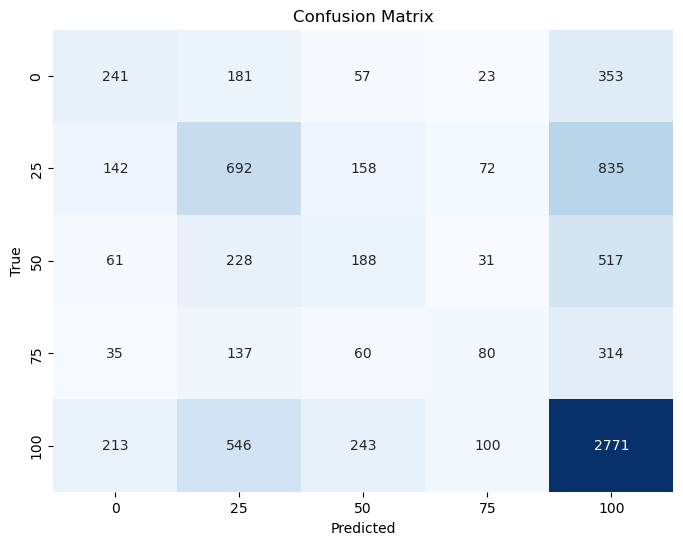

In [19]:
#Random Forest Confusion Matrix Graph
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0','25','50','75','100'],
            yticklabels=['0','25','50','75','100'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()